implementation of bfs and dfs

In [ ]:

from collections import deque
def bfs(graph, start):
    visited = []
    queue = deque([start])
    visited.append(start)
    traversal_result = []

    while queue:
        node = queue.popleft()
        traversal_result.append(node)
        for neighbour in graph[node]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

    print(traversal_result)
    return traversal_result
def dfs (graph,start):
    visited= set()
    traversal_result=[]
    def explore(node):
        traversal_result.append(node)
        visited.add(node)
        for neighbour in graph[node]:
          if neighbour not in visited:
            explore(neighbour)
    explore(start)

    return traversal_result


graph = {
    0: [4, 5,2],
    5: [1, 4, 0],
    4: [2, 0, 5, 1],
    2: [3, 0, 4],
    3: [2],
    1:[4,5],
}
print("bfs traversal")
bfs(graph, 0)
print("\nDFS traversal")
dfs(graph,0)





bfs traversal
[0, 4, 5, 2, 1, 3]

DFS traversal


[0, 4, 2, 3, 5, 1]

generate random numbers

      Size  BFS Time  DFS Time
0     1000  0.000604  0.000266
1    40000  0.028757  0.004334
2    80000  0.026230  0.057063
3   200000  0.195383  0.028048
4  1000000  0.372882  0.665439


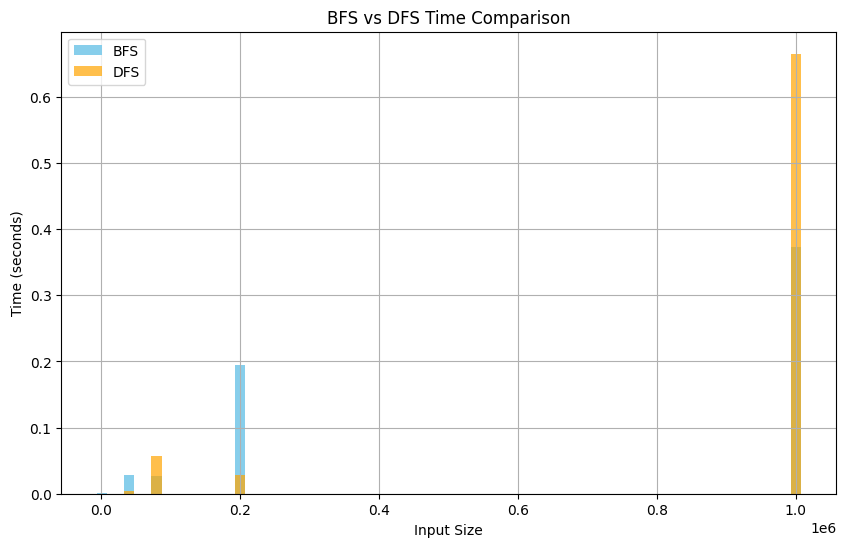

In [ ]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# Step 1: Define dataset sizes
sizes = [1000, 40000, 80000, 200000, 1000000]

# Step 2: Generate random unique datasets
datasets = [random.sample(range(1, size * 2), size) for size in sizes]

# Step 3: Define Node class for BST
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Step 4: Insert function for BST
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Step 5: Build BST from list
def build_bst(lst):
    root = None
    for value in lst:
        root = insert(root, value)
    return root

# Step 6: BFS function
def bfs(root, goal):
    if root is None:
        return False
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.value == goal:
            return True
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return False

# Step 7: DFS function
def dfs(root, goal):
    if root is None:
        return False
    stack = [root]
    while stack:
        node = stack.pop()
        if node.value == goal:
            return True
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return False

# Step 8: Measure time for BFS and DFS
results = []
for i, data in enumerate(datasets):
    bst_root = build_bst(data)
    goal = data[len(data) - 220]  # Goal element

    start_bfs = time.time()
    bfs_result = bfs(bst_root, goal)
    end_bfs = time.time()
    bfs_time = end_bfs - start_bfs

    start_dfs = time.time()
    dfs_result = dfs(bst_root, goal)
    end_dfs = time.time()
    dfs_time = end_dfs - start_dfs

    results.append({'Size': sizes[i], 'BFS Time': bfs_time, 'DFS Time': dfs_time})

# Step 9: Create DataFrame
df = pd.DataFrame(results)
print(df)

# Step 10: Plotting BFS vs DFS time
plt.figure(figsize=(10, 6))
plt.bar(df["Size"], df["BFS Time"], width=15000, label='BFS', color='skyblue')
plt.bar(df["Size"], df["DFS Time"], width=15000, label='DFS', color='orange', alpha=0.7)
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("BFS vs DFS Time Comparison")
plt.legend()
plt.grid(True)
plt.show()




third task

In [ ]:










from collections import deque
graph={
    'islamabad':['rawalpindi','lahore','peshawar'],
    'rawalpindi':['islamabad','peshawar','quetta'],
    'peshawar':['islamabad','rawalpindi','quetta'],
    'lahore':['islamabad','multan','quetta'],
    'multan':['lahore','karachi','quetta'],
    'quetta':['rawalpindi','peshawar','karachi','multan'],
    'karachi':['multan','quetta'],

}
def bfs_shortest_path(graph, start, goal):
    visited = set ()
    queue = deque([(start, [start])])
    while queue:
        (city, path) = queue.popleft()
        if city == goal:
          return path
        if city not in visited:
           for neighbour in graph.get(city,[]):
               new_path=list(path)
               new_path.append(neighbour)
               queue.append((neighbour,new_path))
           visited.add(city)
    return None
start_city='islamabad'
goal_city='karachi'
shortest_path=bfs_shortest_path(graph,start_city,goal_city)
if shortest_path:
  print(f"Shortest path from {start_city} to {goal_city}: {' -> '.join(shortest_path)}")
else:
  print(f"No path found from {start_city} to {goal_city}.")









Shortest path from islamabad to karachi: islamabad -> rawalpindi -> quetta -> karachi
